### 1. Objetivos del Laboratorio
* Comprender la teoría: Repasar los conceptos clave de la visión por computador y las CNN,(función de la capa de convolución, pooling, activación ReLU, y capas totalmente conectadas).

* Implementación práctica: Construir una red neuronal convolucional simple usando una librería de deep learning (por ejemplo, TensorFlow/Keras o PyTorch).

* Entrenamiento y evaluación: Entrenar la CNN en un conjunto de datos de imágenes y evaluar su desempeño en una tarea de clasificación.

* Visualización y análisis: Analizar los filtros aprendidos y observar cómo cada capa extrae características (bordes, texturas, patrones, etc.) de las imágenes.

2. Materiales y Herramientas

Entorno de desarrollo: Python (Jupyter Notebook, Google Colab, VSC)

Librerías: tensorflow, numpy, matplotlib.

Dataset: MNIST (para dígitos) que se puede cargar directamente desde las APIs de las librerías.



### Preparación del Entorno y Carga del Dataset
x_train y x_test: Contienen las imágenes de los dígitos.

y_train y y_test: Contienen las etiquetas correspondientes (los dígitos que representan).

In [ ]:
from tensorflow.keras.datasets import mnist

# Cargar el dataset y dividirlo en entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Redimensionar las imágenes para incluir la dimensión de canales (en este caso, 1 canal)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalizar los valores de los píxeles para que estén entre 0 y 1
x_train = x_train / 255.0
x_test = x_test / 255.0



### Construcción de la Arquitectura de la CNN

Capa de Convolución: Aplicar varios filtros (por ejemplo, 32 filtros de 3x3) con función de activación ReLU.

Capa de Pooling: Utilizar max pooling para reducir la dimensionalidad espacial.

Capa de Aplanamiento (Flatten): Convertir la salida 2D a un vector para conectarlo con la capa densa.

Capa Totalmente Conectada (Dense): Una o dos capas densas que terminen en una capa softmax para clasificación.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento y Evaluación

In [ ]:
#Entrenar la red con el conjunto de entrenamiento y monitorizar el progreso.
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.9073 - loss: 0.3136 - val_accuracy: 0.9813 - val_loss: 0.0669
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9826 - loss: 0.0586 - val_accuracy: 0.9817 - val_loss: 0.0657
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 23ms/step - accuracy: 0.9889 - loss: 0.0351 - val_accuracy: 0.9867 - val_loss: 0.0517
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9880 - val_loss: 0.0475
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.9956 - loss: 0.0145 - val_accuracy: 0.9875 - val_loss: 0.0559


In [ ]:
#Evaluar el modelo con el conjunto de prueba:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9839 - loss: 0.0548
Test accuracy: 0.99


### Visualización y Análisis

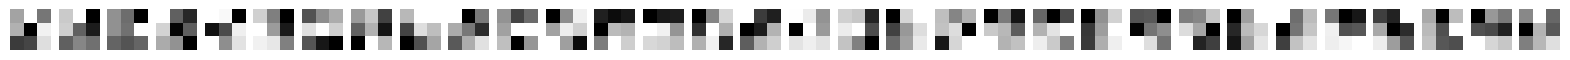

In [ ]:
#Visualización de filtros: Extraer y visualizar algunos de los filtros aprendidos en la primera capa convolucional para comprender qué patrones están detectando.

import matplotlib.pyplot as plt
filters, biases = model.layers[0].get_weights()
n_filters = filters.shape[-1]

fig, axes = plt.subplots(1, n_filters, figsize=(20, 3))
for i in range(n_filters):
    ax = axes[i]
    # Se visualiza el filtro del canal central (o se puede promediar entre canales)
    ax.imshow(filters[:, :, 0, i], cmap='gray')
    ax.axis('off')
plt.show()


Cada barra corresponde a un valor numérico en un vector de pesos (o de activaciones).

* El color o tono de gris indica la magnitud y el signo (si se codifica así) de ese valor:

* Tonos más claros/blancos: valores más altos o positivos.

* Tonos oscuros/negros: valores más bajos o negativos.

* Tonos grises intermedios: valores cercanos a cero o de magnitud media.

Este tipo de visualizaciones ayuda a entender qué tan dispersos o concentrados están los valores de los pesos/activaciones.

Permite ver si la red está aprendiendo patrones muy marcados (por ejemplo, muchos valores altos/positivos) o si los pesos están próximos a cero (lo que a veces indica “desactivación” de un filtro).



### Ejemplos de clasificacion

In [ ]:
#ejemplo con una imagen de un numero en otro formato

from PIL import Image
import numpy as np

# Cargar la imagen y convertirla a escala de grises
img = Image.open("digit.png").convert('L')

# Redimensionar la imagen a 28x28 píxeles (formato MNIST)
img = img.resize((28, 28))

# Convertir la imagen a un arreglo numpy y normalizar los valores a [0, 1]
img_array = np.array(img) / 255.0

# Asegurar que el arreglo tenga la forma (1, 28, 28, 1)
img_array = img_array.reshape(1, 28, 28, 1)

# Usar el modelo entrenado para predecir la clase de la imagen
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

print(f"La imagen fue clasificada como: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
La imagen fue clasificada como: 0


In [ ]:
#ejemplo con un numero escrito a mano en fondo negro
from PIL import Image
import numpy as np

# Cargar la imagen y convertirla a escala de grises
img = Image.open("digit2.png").convert('L')

# Redimensionar la imagen a 28x28 píxeles (formato MNIST)
img = img.resize((28, 28))

# Convertir la imagen a un arreglo numpy y normalizar los valores a [0, 1]
img_array = np.array(img) / 255.0

# Asegurar que el arreglo tenga la forma (1, 28, 28, 1)
img_array = img_array.reshape(1, 28, 28, 1)

# Usar el modelo entrenado para predecir la clase de la imagen
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

print(f"La imagen fue clasificada como: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
La imagen fue clasificada como: 4
